In [ ]:
pip install google_play_scraper

     |████████████████████████████████| 51kB 3.2MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-0.1.2-cp36-none-any.whl size=22280 sha256=7304b32d217759950cb482ad12483a9b73a0a3fc396945da5d3eac8b06504939
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dc/847f7da787b7d2c28b26a5062f86eac3f16a8cb0bdfdc1f308
Successfully built google-play-scraper


In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 3.0MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.1-cp36-cp36m-linux_x86_64.whl size=149168 sha256=6d821d2f52831116b505a74f42fe3b44425898dd35ceb7d5d7150ff5955dd9f7
  Stored in directory: /root/.cache/pip/wheels/ae/69/ea/4798f98317cbab35d78fea64d36bd7b2b18faca88568ef15b0
Successfully built python-levenshtein


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
pip install emoji

     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49717 sha256=d1377cb5fb1859caa92ce2fd133e95363f9c84522b56a7647a732686b010c38b
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [ ]:
pip install twython

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from tqdm import tqdm
import emoji
from gensim.parsing.preprocessing import remove_stopwords
import gensim
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.sentiment import SentimentIntensityAnalyzer
from google_play_scraper import Sort, reviews
from google.colab import files
sia=SentimentIntensityAnalyzer()

In [ ]:
from google_play_scraper import Sort, reviews
result, continuation_token = reviews('com.mpokket.app',lang='en',country='us',sort=Sort.NEWEST,count=300000)

In [ ]:
df=pd.DataFrame.from_dict(result)

In [ ]:
df.sort_values(by='at')

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
145728,gp:AOqpTOFL8VO7GsgT5koyLHS7jmDl__Tzy4i6n4JSIwF...,Dark Assassin,https://play-lh.googleusercontent.com/-E41kUdZ...,Excellent app!,5,0,1.0.4,2016-12-08 14:46:38,None,NaT
145727,gp:AOqpTOHN4LVcGxUTn3Mep9Es9LorkouPaBFrqE1xZom...,Vivek M,https://play-lh.googleusercontent.com/a-/AOh14...,Helpful for students,5,0,1.0.4,2016-12-09 08:39:23,None,NaT
145726,gp:AOqpTOFOeJWBbqoY0zgxoQrda-GlzvfQ6EslJKHRY_C...,Shobhit Chandak,https://play-lh.googleusercontent.com/a-/AOh14...,Very helpful app!,5,0,1.0.4,2016-12-09 15:16:57,None,NaT
145725,gp:AOqpTOF9X5wTaWUP_WigEsEUvo5iWSLMJ9upRnXc_vT...,Subhankar Pramanik,https://play-lh.googleusercontent.com/a-/AOh14...,Really usefull app..,5,0,1.0.4,2016-12-13 12:15:06,None,NaT
145724,gp:AOqpTOHvWLJ07GgmQAsw_1dgx5fE_5uEBd1ZLON0Haw...,Jayshree Khandelia,https://play-lh.googleusercontent.com/a-/AOh14...,"Swift,smooth and helpful specially to us stude...",5,0,1.0.4,2016-12-18 16:29:42,None,NaT
...,...,...,...,...,...,...,...,...,...,...
4,gp:AOqpTOEInw_56Lw7zCsttFIsV9lae8YZ-8IgeIuMCxA...,Amol Shirsath,https://play-lh.googleusercontent.com/-rk9c3YB...,Nice,5,0,3.4.0,2021-01-22 18:59:18,None,NaT
3,gp:AOqpTOGaRqZjZCb0TwklT0UOoXgcCGUNhry32VRlqGc...,Ramar Quality Engineer,https://play-lh.googleusercontent.com/-138wgAT...,Good,4,0,3.4.0,2021-01-22 19:38:16,None,NaT
2,gp:AOqpTOE24anFe83JlgqwY2XIPyWGiSUbB5j4pKwHYhw...,Uday Kumar lanka,https://play-lh.googleusercontent.com/a-/AOh14...,Even a day late for the payment we will get co...,1,0,3.4.0,2021-01-22 19:57:14,None,NaT
1,gp:AOqpTOEMsEiaiahtj4qvDAEQrgodoQwJLRBc_kxl5bY...,JIJEESH JIJI,https://play-lh.googleusercontent.com/a-/AOh14...,Good app,4,0,3.4.0,2021-01-22 20:57:18,"Dear mPokket User , Thank you for the apprecia...",2020-11-24 11:50:03


In [ ]:
import datetime
x=datetime.datetime(2020,1,1)

In [ ]:
df=df.loc[df['at']>=x]

In [ ]:
df.count()

reviewId                61922
userName                61922
userImage               61922
content                 61922
score                   61922
thumbsUpCount           61922
reviewCreatedVersion    50929
at                      61922
replyContent            57455
repliedAt               57455
dtype: int64

In [ ]:
y=datetime.datetime.now()

In [ ]:
y-x

datetime.timedelta(387, 83293, 889599)

In [ ]:
df.drop(['reviewId','userName','userImage','thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','at'],axis=1,inplace=True)

In [ ]:
li=[]
for st in tqdm(df.content):
  st=str(st)
  sent=emoji.demojize(st)
  sent=sent.replace(':',' ')
  sent=sent.replace('_',' ')
  sent=sent.lower()
  sent=re.sub(r"[^A-Za-z ']",'',sent)
  sent=re.sub(r"l...$",'loan',sent)
  sent=re.sub(r'a.p$','app',sent)
  sent=remove_stopwords(sent)
  li.append(sent)

df['cleaned']=li
df.head()

100%|██████████| 61922/61922 [00:19<00:00, 3129.83it/s]


,content,score,cleaned
0,Good,5,good
1,Good app,4,good app
2,Even a day late for the payment we will get co...,1,day late payment continuously calls that's dis...
3,Good,4,good
4,Nice,5,nice


In [ ]:
wnl=WordNetLemmatizer()
def labeller(label):
  if label=='J':
    return wn.ADJ
  elif label=='N':
    return wn.NOUN
  elif label=='V':
    return wn.VERB
  elif label=='R':
    return wn.ADV
lm=[]
wvex=[]
for sent in tqdm(df.cleaned):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    pos_l=pos_tag(word_tokenize(tok))
    label=pos_l[0][1][0]
    pos=labeller(label)
    try:
      lemm=wnl.lemmatize(tok,pos)
    except:
      lemm=wnl.lemmatize(tok)
    lm.append(lemm)
  wvex.append(lm)
  lm=[]
df['word__vec']=wvex
df.head()
df.to_csv('Nira_1year_2021-01-21 18:16:08.csv')
files.download('Nira_1year_2021-01-21 18:16:08.csv')

100%|██████████| 61922/61922 [01:37<00:00, 637.74it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
sentences=[]
count=0
for toks in tqdm(df.word__vec):
  if len(toks)>4:
    sentences.append(toks)
    count+=1
print(count)
total=count
wwv=gensim.models.Word2Vec(sentences,min_count=1,size=100,window=4)
wwv.wv.most_similar(positive=['interest','rate','high'],topn=40)

100%|██████████| 61922/61922 [00:00<00:00, 1626857.67it/s]


22294


[('intrest', 0.9861235618591309),
 ('bit', 0.9808534383773804),
 ('little', 0.9738234281539917),
 ('hidden', 0.9726890325546265),
 ('cost', 0.9673525094985962),
 ('calculation', 0.9647442102432251),
 ('interst', 0.9639343023300171),
 ('reduce', 0.961674690246582),
 ('price', 0.9589508175849915),
 ('fee', 0.9488260746002197),
 ('normal', 0.9445590376853943),
 ('charge', 0.9442327618598938),
 ('purely', 0.9397034645080566),
 ('expencive', 0.9388099312782288),
 ('principle', 0.9374478459358215),
 ('interset', 0.9363162517547607),
 ('interes', 0.9348494410514832),
 ('reasonable', 0.9311424493789673),
 ('duration', 0.9289082288742065),
 ('additional', 0.9267340898513794),
 ('solablue', 0.9254084825515747),
 ('moderate', 0.9241814613342285),
 ('intrwat', 0.9239119291305542),
 ('yearskindly', 0.9235502481460571),
 ('engineering', 0.919692873954773),
 ('intrested', 0.9195972681045532),
 ('paymentthey', 0.9194878339767456),
 ('amountsand', 0.9192067384719849),
 ('exorbitant', 0.9180595278739929

In [ ]:
total=count

In [ ]:
total

22294

In [ ]:
t=61922

100%|██████████| 61922/61922 [00:16<00:00, 3716.93it/s]



 2447
0.10976047367004575
{'neg': 0.137, 'neu': 0.577, 'pos': 0.286, 'compound': 1.0}


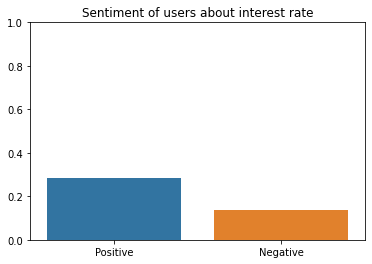

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A1=''
li_A1=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.partial_token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80) :
      ind=1
  if ind==1:
    count+=1
    review_about_A1=review_about_A1+sent+' '
    li_A1.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A1)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about interest rate')
plt.show()

In [ ]:
df.count()

content      61922
score        61922
cleaned      61922
word__vec    61922
dtype: int64

100%|██████████| 61922/61922 [00:16<00:00, 3663.57it/s]


2445 8069
3.300204498977505


([<matplotlib.patches.Wedge at 0x7febcc081ba8>,
 [Text(-0.5300529400039707, 0.963869223905996, ''),
  Text(0.5300529400039706, -0.963869223905996, '')])

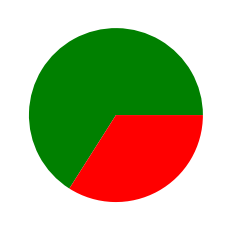

In [ ]:
sum_rating_A1=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('interest rate',sent)>90) or (fuzz.token_set_ratio('loan rate',sent)>90)or (fuzz.token_set_ratio('high interest rate',sent)>90)or (fuzz.token_set_ratio('low interest rate',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('interest',tok)>80) or (fuzz.ratio('rate',tok)>=80):
      ind=1
  if ind==1:
    sum_rating_A1+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A1)
print(sum_rating_A1/count)
pie=sum_rating_A1/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 2447/2447 [00:00<00:00, 5728.67it/s]


1653 1170


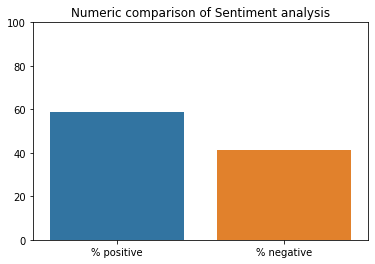

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A1):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

489
605
61
[42.33766233766234, 52.38095238095239, 5.2813852813852815]


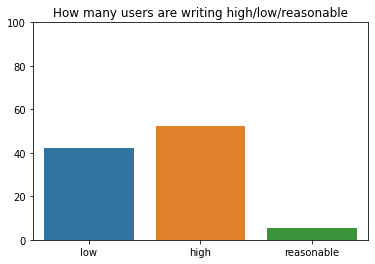

In [ ]:
low=0
for sent in li_A1:
  if ('low' in sent) or ('loanlow' in sent) or ('lowit' in sent) or ('lowest' in sent) or ('lower' in sent) or ('law' in sent) or('lowe' in sent):
    low+=1
print(low)
high=0
for sent in li_A1:
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('high rate',sent)>90):
    high+=1
print(high)
comp=0
for sent in li_A1:
  if ('comparing' in sent) or ('descent' in sent) or ('reasonable' in sent) or ('competitive' in sent) or ('genuine' in sent) or ('comparision' in sent) or ('worth' in sent):
    comp+=1
print(comp)
li=[(low/(low+high+comp))*100,(high/(low+high+comp))*100,(comp/(low+high+comp))*100]
print(li)
key=['low','high','reasonable']
g=sns.barplot(x=key,y=li)
g.set(ylim=(0,100))
plt.title('How many users are writing high/low/reasonable')
plt.show()

100%|██████████| 61922/61922 [00:16<00:00, 3779.09it/s]



 264
0.011841751143805508
{'neg': 0.092, 'neu': 0.591, 'pos': 0.317, 'compound': 1.0}


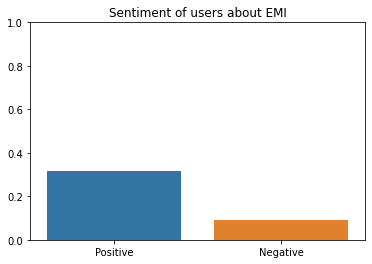

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A2=''
li_A2=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A2=review_about_A2+sent+' '
    li_A2.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A2)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about EMI')
plt.show()

100%|██████████| 61922/61922 [00:18<00:00, 3366.56it/s]

264 966
3.659090909090909


([<matplotlib.patches.Wedge at 0x7febcba6cfd0>,
 [Text(-0.7321442907650243, 0.8209535538020283, ''),
  Text(0.7321443676282399, -0.8209534852537291, '')])

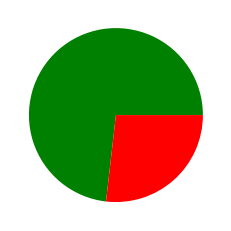

In [ ]:
sum_rating_A2=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('emi installment',sent)>90) or (fuzz.token_set_ratio('delayed instalment',sent)>90)or (fuzz.token_set_ratio('due payment emi',sent)>90)or (fuzz.token_set_ratio('emi installment',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('emi',tok)>90) or (fuzz.ratio('installment',tok)>90)or (fuzz.ratio('outstanding',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A2+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A2)
print(sum_rating_A2/count)
pie=sum_rating_A2/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 264/264 [00:00<00:00, 4385.78it/s]


213 114


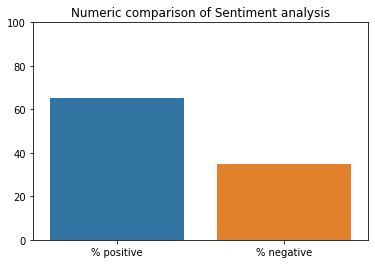

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A2):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

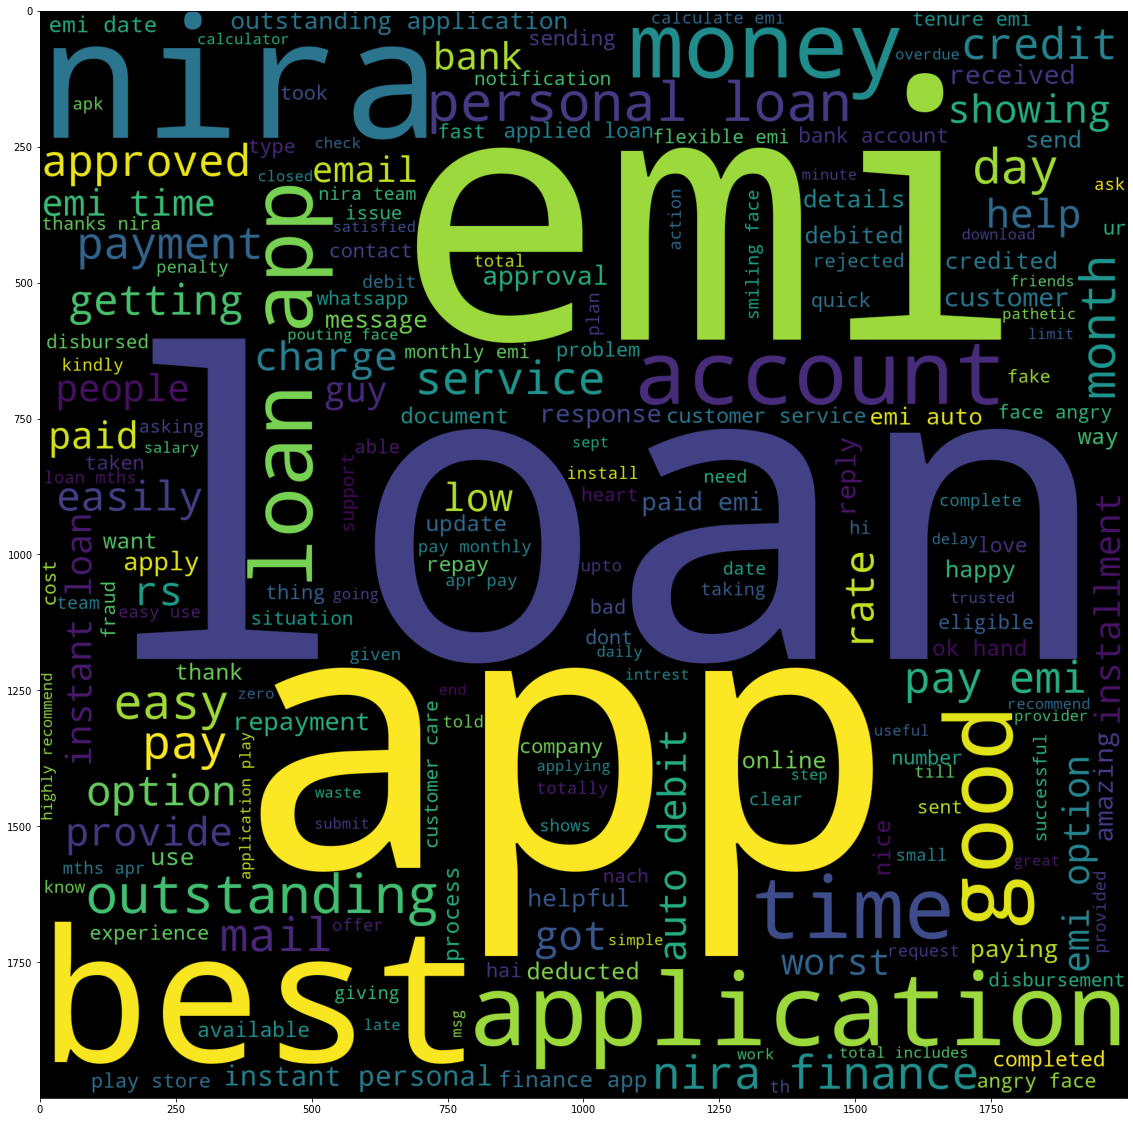

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
stopwords = list(STOPWORDS)
stopwords=set(stopwords+['loan','app','application'])
wc = WordCloud(width = 2000, height =2000, stopwords = stopwords, min_font_size = 10).generate(review_about_A2)
plt.figure(figsize = (20, 20), facecolor=None) 
plt.imshow(wc)

100%|██████████| 61922/61922 [00:24<00:00, 2491.61it/s]



 304
0.013635955862563918
{'neg': 0.147, 'neu': 0.603, 'pos': 0.249, 'compound': 1.0}


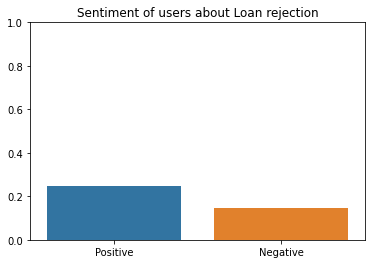

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
ind=0
count=0
review_about_A3=''
li_A3=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A3=review_about_A3+sent+' '
    li_A3.append(sent)
  ind=0

print('\n',count)
print(count/total)
dic=sia.polarity_scores(review_about_A3)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Loan rejection')
plt.show()

100%|██████████| 61922/61922 [00:27<00:00, 2279.36it/s]

304 906
2.9802631578947367


([<matplotlib.patches.Wedge at 0x7febcb8f1748>,
 [Text(-0.3269194573204183, 1.050296942976282, ''),
  Text(0.32691945732041794, -1.050296942976282, '')])

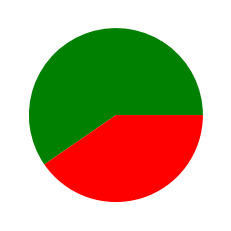

In [ ]:
sum_rating_A3=0
count=0
for i in tqdm(range(t)):
  sent=str(df.cleaned[i])
  toks=word_tokenize(sent)
  if  (fuzz.token_set_ratio('loyal but',sent)>80) or (fuzz.token_set_ratio('not giving loan',sent)>90)or (fuzz.token_set_ratio('not getting loan',sent)>90)or(fuzz.token_set_ratio('regular customer but not getting loan',sent)>80)or (fuzz.token_set_ratio('regualar customer blocked',sent)>80)or (fuzz.token_set_ratio('rejected application',sent)>90)or (fuzz.token_set_ratio('blocked user profile', sent)>80) or (fuzz.token_set_ratio('blocked account',sent)>80):
    ind=1
  for tok in toks:
    if  (fuzz.ratio('loyal',tok)>=80) or (fuzz.ratio('regular',tok)>80)or (fuzz.ratio('rejected',tok)>90)or (fuzz.ratio('reapply',tok)>90)or (fuzz.ratio('blocked',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A3+=df.score[i]
    count+=1
  ind=0 
print(count,sum_rating_A3)
print(sum_rating_A3/count)
pie=sum_rating_A3/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 304/304 [00:00<00:00, 3486.55it/s]


219 182


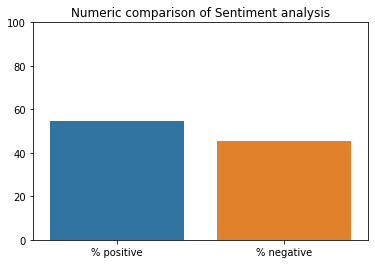

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A3):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 61922/61922 [00:20<00:00, 3065.53it/s]



 5081
22.790885440028706
{'neg': 0.155, 'neu': 0.532, 'pos': 0.312, 'compound': 1.0}


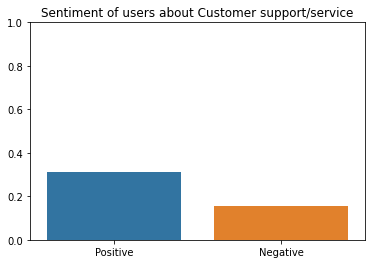

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A5=''
ind=0
li_A5=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    review_about_A5=review_about_A5+sent+' '
    li_A5.append(sent)
    count+=1
  ind=0
print('\n',count)
print(count*100/total)
dic=sia.polarity_scores(review_about_A5)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Customer support/service')
plt.show()

100%|██████████| 61922/61922 [00:21<00:00, 2827.48it/s]


 17745 5081
3.4924227514268846


([<matplotlib.patches.Wedge at 0x7febcb803208>,
 [Text(-0.6423196002337132, 0.8929868594529279, ''),
  Text(0.6423196002337135, -0.8929868594529276, '')])

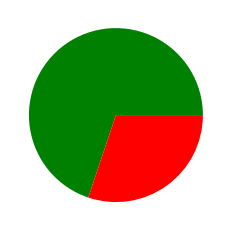

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
sum_rating_A5=0
ind=0
for i in tqdm(range(t)):
  sent=df.cleaned[i]
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('customer support',sent)>70) or (fuzz.token_set_ratio('customer service',sent)>80)or (fuzz.token_set_ratio('user friendly',sent)>80)or (fuzz.token_set_ratio('customer care',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('customer',tok)>=80) or (fuzz.ratio('service',tok)>90)or (fuzz.ratio('support',tok)>90)or (fuzz.ratio('message',tok)>90)or (fuzz.ratio('response',tok)>90)or (fuzz.ratio('reply',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A5+=df.score[i]
    count+=1
  ind=0
print('\n',sum_rating_A5,count)
print(sum_rating_A5/count)
pie=sum_rating_A5/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

4300 2105


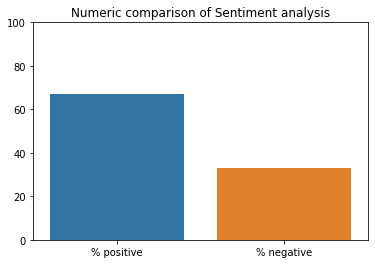

In [ ]:
pos,neg=0,0
for sent in li_A5:
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 61922/61922 [00:29<00:00, 2090.47it/s]



 2547 11.424598546694178
{'neg': 0.163, 'neu': 0.598, 'pos': 0.239, 'compound': 1.0}


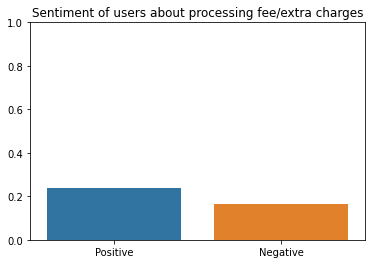

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A6=''
li_A6=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    review_about_A6=review_about_A6+sent+' '
    li_A6.append(sent)
    count+=1
  ind=0
print('\n',count,count*100/total)
dic=sia.polarity_scores(review_about_A6)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about processing fee/extra charges')
plt.show()

100%|██████████| 61922/61922 [00:32<00:00, 1879.06it/s]


 3.056537102473498


([<matplotlib.patches.Wedge at 0x7febcb0d1400>,
 [Text(-0.37685964071299144, 1.033429635341311, ''),
  Text(0.3768596407129909, -1.0334296353413113, '')])

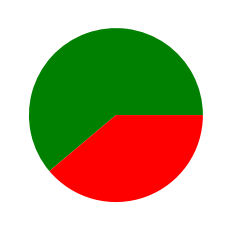

In [ ]:
count=0
sum_rating_A6=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('processing fee',sent)>70) or (fuzz.token_set_ratio('process fee',sent)>80)or (fuzz.token_set_ratio('hidden charges',sent)>80)or (fuzz.ratio('extra cost',sent)>80):
    ind=1
  for tok in toks:
    if (fuzz.ratio('fee',tok)>=80) or (fuzz.ratio('charge',tok)>90)or (fuzz.ratio('hidden',tok)>90)or (fuzz.ratio('cost',tok)>90)or (fuzz.ratio('processing',tok)>90)or (fuzz.ratio('tax',tok)>90)or (fuzz.ratio('taxation',tok)>90)or (fuzz.partial_ratio('looting', tok)>90)or (fuzz.ratio('loot',tok)>90)or (fuzz.ratio('extra',tok)>90)or (fuzz.ratio('gst',tok)>=80)or (fuzz.ratio('overdue',tok)>90)or (fuzz.ratio('bounce',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A6+=df.score[i]
  ind=0
print('\n',sum_rating_A6/count)
pie=sum_rating_A6/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

100%|██████████| 2547/2547 [00:00<00:00, 4130.10it/s]


1929 1543


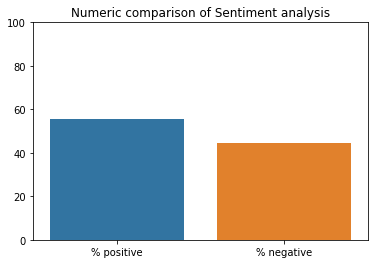

In [ ]:
pos,neg=0,0
for sent in tqdm(li_A6):
  dic=sia.polarity_scores(sent)
  if dic['pos']>0:
    pos+=1
  if dic['neg']>0:
    neg+=1
print(pos,neg)

values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparison of Sentiment analysis')
plt.show()

100%|██████████| 61922/61922 [00:26<00:00, 2356.93it/s]



 8016 0.35955862563918545
{'neg': 0.165, 'neu': 0.571, 'pos': 0.263, 'compound': 1.0}


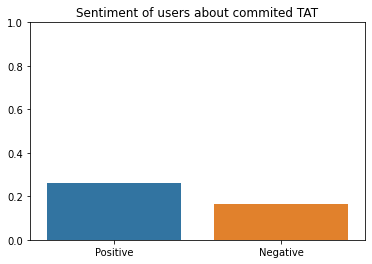

In [ ]:
from nltk.tokenize import word_tokenize
from fuzzywuzzy import fuzz 
count=0
review_about_A7=''
ind=0
li_A7=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(str(sent))
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    review_about_A7=review_about_A7+sent+' '
    li_A7.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A7)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about commited TAT')
plt.show()  

100%|██████████| 61922/61922 [00:26<00:00, 2324.83it/s]


 8016 3.4145459081836327


([<matplotlib.patches.Wedge at 0x7febcb001278>,
 [Text(-0.5978731408386386, 0.9233351003096013, ''),
  Text(0.5978731408386381, -0.9233351003096016, '')])

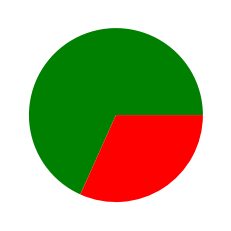

In [ ]:
count=0
sum_rating_A7=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.token_set_ratio('waiting approval',sent)>70):
    ind=1
  for tok in toks:
    if (fuzz.ratio('time',tok)>=80) or (fuzz.ratio('late',tok)>90)or (fuzz.ratio('waiting',tok)>90)or (fuzz.ratio('delay',tok)>90)or (fuzz.ratio('tenure',tok)>90)or (fuzz.ratio('limit',tok)>90)or (fuzz.ratio('long',tok)>90)or (fuzz.ratio('date',tok)>90)or (fuzz.ratio('emergency',tok)>90)or (fuzz.ratio('quick',tok)>90)or (fuzz.ratio('speedy',tok)>90)or (fuzz.ratio('disburse',tok)>90)or (fuzz.ratio('pending',tok)>90)or (fuzz.ratio('wait',tok)>90):
      ind=1
  if ind==1:
    count+=1
    sum_rating_A7+=df.score[i]
  ind=0
print('\n',count,sum_rating_A7/count)
pie=sum_rating_A7/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

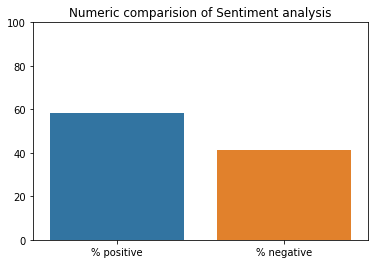

In [ ]:
pos,neg=0,0
for sent in li_A7:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

100%|██████████| 61922/61922 [00:23<00:00, 2665.23it/s]



 2896 0.12990042163810891
{'neg': 0.313, 'neu': 0.578, 'pos': 0.109, 'compound': -1.0}


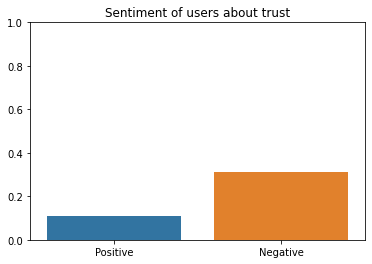

In [ ]:
from fuzzywuzzy import fuzz
from nltk.tokenize import word_tokenize
review_about_A8=''
li_A8=[]
ind=0
count=0
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    review_about_A8=review_about_A8+sent+' '
    li_A8.append(sent)
    count+=1
  ind=0
print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A8)
print(dic)
values=[dic['pos'],dic['neg']]
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about trust')
plt.show() 

100%|██████████| 61922/61922 [00:22<00:00, 2796.21it/s]


 2896 1.5183011049723756


([<matplotlib.patches.Wedge at 0x7febcacc4a20>,
 [Text(0.6362881704636506, 0.8972944690167328, ''),
  Text(-0.6362881704636506, -0.8972944690167328, '')])

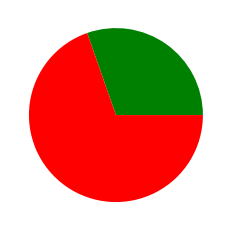

In [ ]:
ind=0
count=0
sum_rating_A8=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  for tok in toks:
    if (fuzz.ratio('trust',tok)>90)or (fuzz.ratio('fake',tok)>90)or(fuzz.ratio('fraud',tok)>90)or (fuzz.ratio('waste',tok)>90)or (fuzz.ratio('harassment',tok)>90)or (fuzz.ratio('rbi',tok)>90)or (fuzz.ratio('nbfc',tok)>90) or (fuzz.ratio('law',tok)>90) or (fuzz.ratio('legal',tok)>90)or (fuzz.ratio('cheat',tok)>80)or (fuzz.ratio('scam',tok)>90)or (fuzz.ratio('uninstall',tok)>85):
      ind=1
  if ind==1:
    sum_rating_A8+=df.score[i]
    count+=1
  ind=0
print('\n',count,sum_rating_A8/count)
pie=sum_rating_A8/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

1533 2514


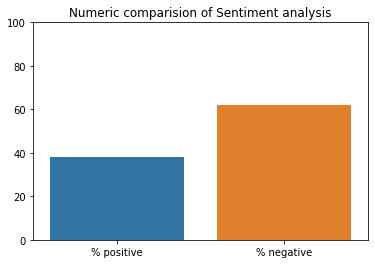

In [ ]:
pos,neg=0,0
for sent in li_A8:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()


100%|██████████| 61922/61922 [00:17<00:00, 3525.95it/s]



 1107 0.04965461559163901
{'neg': 0.184, 'neu': 0.609, 'pos': 0.208, 'compound': 1.0}


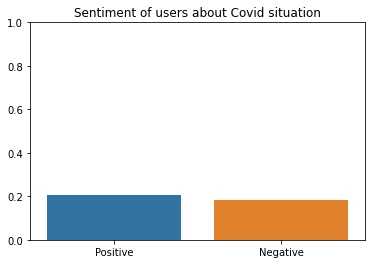

In [ ]:
ind=0
count=0
review_about_A9=''
li_A9=[]
for sent in tqdm(df['cleaned']):
  sent=str(sent)
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    count+=1
    review_about_A9=review_about_A9+sent+' '
    li_A9.append(sent)
  ind=0

print('\n',count,count/total)
dic=sia.polarity_scores(review_about_A9)
values=[dic['pos'],dic['neg']]
print(dic)
keys=['Positive','Negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,1))
plt.title('Sentiment of users about Covid situation')
plt.show() 

100%|██████████| 61922/61922 [00:19<00:00, 3238.29it/s]



 1107 2.973803071364047


([<matplotlib.patches.Wedge at 0x7febcaed1c88>,
 [Text(-0.3226535213611892, 1.0516152838149628, ''),
  Text(0.3226535213611893, -1.0516152838149628, '')])

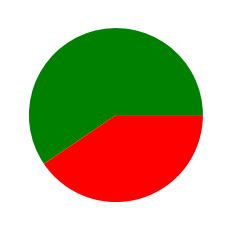

In [ ]:
count=0
sum_rating_A9=0
ind=0
for i in tqdm(range(t)):
  sent=str(df['cleaned'][i])
  toks=word_tokenize(sent)
  if (fuzz.partial_token_set_ratio('covid situation',sent)>90)or (fuzz.token_set_ratio('corona virus',sent)>90):
    ind=1
  for tok in toks:
    if (fuzz.ratio('Kovid',tok)>90) or (fuzz.ratio('covid',tok)>90)or (fuzz.ratio('pandemic',tok)>90)or (fuzz.ratio('corona',tok)>90) or (fuzz.ratio('lockdown',tok)>90):
      ind=1
  if ind==1:
    sum_rating_A9+=df.score[i]
    count+=1
  ind=0  
print('\n',count,sum_rating_A9/count)
pie=sum_rating_A9/count
pi=[pie,(5-pie)]
plt.pie(pi,colors=['green','red'])

858 797


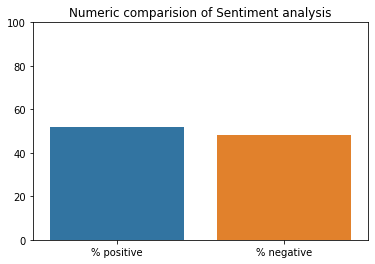

In [ ]:
pos,neg=0,0
for sent in li_A9:
  dic=sia.polarity_scores(sent)
  if (dic['pos']>0):
    pos+=1
  if (dic['neg']>0):
    neg+=1

print(pos,neg)
values=[(pos/(pos+neg))*100,(neg/(neg+pos)*100)]
keys=['% positive','% negative']
g=sns.barplot(x=keys,y=values)
g.set(ylim=(0,100))
plt.title('Numeric comparision of Sentiment analysis')
plt.show()

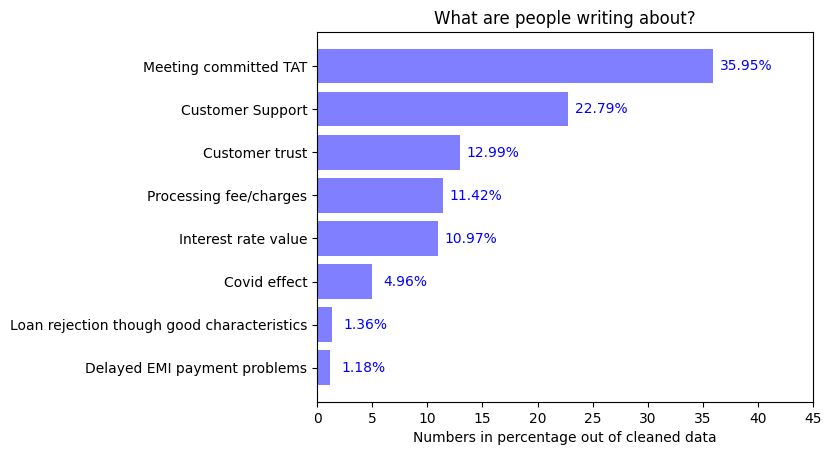

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[10.97,1.18,1.36,22.79,11.42,35.95,12.99,4.96]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)


objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,45)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v + 3, i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()

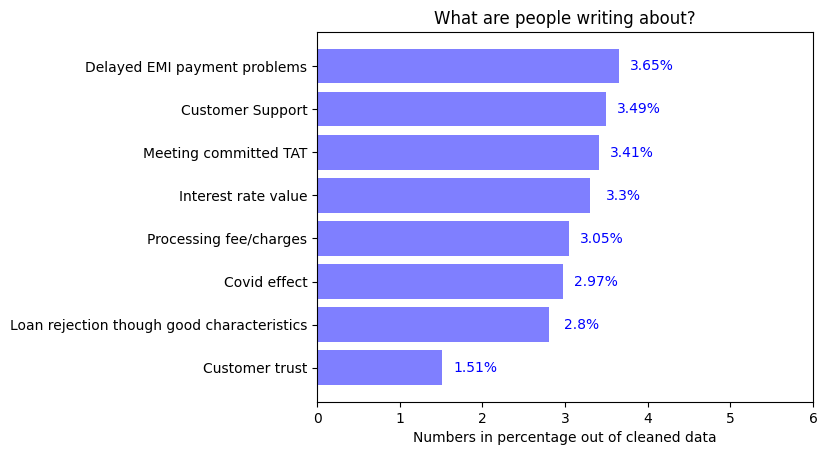

In [ ]:
key=['Interest rate value','Delayed EMI payment problems','Loan rejection though good characteristics','Customer Support','Processing fee/charges','Meeting committed TAT','Customer trust','Covid effect']
y=[3.30,3.65,2.80,3.49,3.05,3.41,1.51,2.97]
d=pd.DataFrame(key,columns=['key'])
d['y']=y
d=d.sort_values(by='y')
key=list(d.key)
y=list(d.y)
objects = tuple(key)
y_pos = np.arange(len(objects))
performance = y
fig, ax = plt.subplots()
ax.barh(y_pos, performance, align='center', alpha=0.5,color='blue')
plt.xlim(0,6)
plt.yticks(y_pos, objects)
plt.xlabel('Numbers in percentage out of cleaned data')
plt.title('What are people writing about?')
for i, v in enumerate(performance):
    ax.text(v+0.4 , i, str(v)+'%', color='blue',horizontalalignment='center',verticalalignment='center')
plt.show()